In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [80]:
def base_line(a,b, amp):
    x = np.arange(-50, 50, 1)
    rand_x = np.random.normal(0, 1, len(x))*amp
    rand_y = np.random.normal(0, 1, len(x))*amp
    y = a*(x - rand_x) + (b + rand_y)
    return x, y

In [81]:
A = 100
B = 200

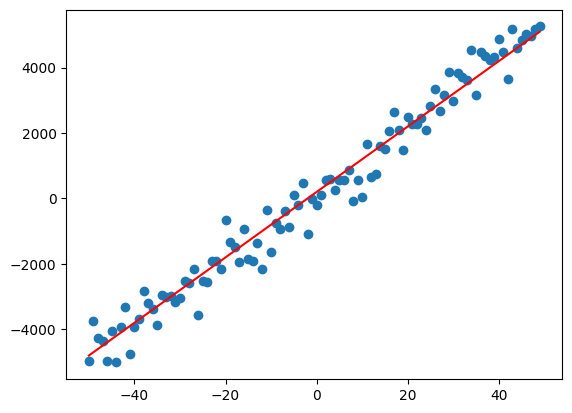

In [82]:
# plot the base line
x_train, y_train = base_line(A, B, 5)
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, A*x_train + B, 'r')
plt.show()

In [146]:
class LinearRegression:
    def __init__(self, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.a = A+100
        self.b = B+1000
        self.lr = lr
        self.cache = []

        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.momentum = {
            'a': 0,
            'b': 0
        }
        self.velocity = {
            'a': 0,
            'b': 0
        }
        self.t = 0

    def forward(self, x):
        self.cache = x
        return self.a*x + self.b

    def loss(self, y_pred, y):
        # MSE Loss
        return np.mean((y_pred - y)**2)

    def backward(self, y_pred, y):
        x = self.cache
        da = np.mean((y_pred - y)*2*x)
        db = np.mean(y_pred - y)*2
        self.adam(da, db)
        # self.a -= self.lr*da
        # self.b -= self.lr*db

    def adam(self, da, db):
        # Adam Optimizer
        self.t += 1
        self.momentum['a'] = self.beta1*self.momentum['a'] + (1 - self.beta1)*da
        self.momentum['b'] = self.beta1*self.momentum['b'] + (1 - self.beta1)*db
        self.velocity['a'] = self.beta2*self.velocity['a'] + (1 - self.beta2)*(da**2)
        self.velocity['b'] = self.beta2*self.velocity['b'] + (1 - self.beta2)*(db**2)
        m_hat_a = self.momentum['a']/(1 - self.beta1**self.t)
        m_hat_b = self.momentum['b']/(1 - self.beta1**self.t)
        v_hat_a = self.velocity['a']/(1 - self.beta2**self.t)
        v_hat_b = self.velocity['b']/(1 - self.beta2**self.t)
        
        self.a -= self.lr*m_hat_a/(np.sqrt(v_hat_a) + self.epsilon)
        self.b -= self.lr*m_hat_b/(np.sqrt(v_hat_b) + self.epsilon)



In [147]:
# train the model

EPOCHS = 200
def train(model, x_train, y_train, verbose = True, one_step = False):
    history = []
    for epoch in range(EPOCHS):
        out = model.forward(x_train)
        loss = model.loss(out, y_train)
        history.append(loss)
        model.backward(out, y_train)
        
        if verbose:
            print('Epoch: {}, Loss: {}'.format(epoch+1, loss))
        if one_step:
            break

    return history

In [148]:
model = LinearRegression(lr = 50)
history = train(model, x_train, y_train, verbose = False)

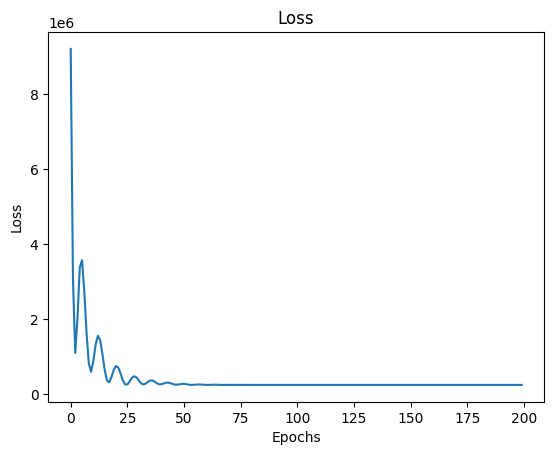

In [149]:
plt.plot(history)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [150]:
# plot gradient of a and b
# make grid
a = np.arange(A-100, A+100, 1)
b = np.arange(B-1000, B+1000, 1)
a_grid, b_grid = np.meshgrid(a, b)
loss_grid = np.zeros(a_grid.shape)
for i in range(a_grid.shape[0]):
    for j in range(a_grid.shape[1]):
        loss_grid[i, j] = model.loss(a_grid[i, j]*x_train + b_grid[i, j], y_train)

print(np.max(loss_grid))
print(np.min(loss_grid))

10049617.727827258
240689.09566393113


true line: y = 100x + 200
regression line: y = 101.93694188552041x + 177.48292739721086


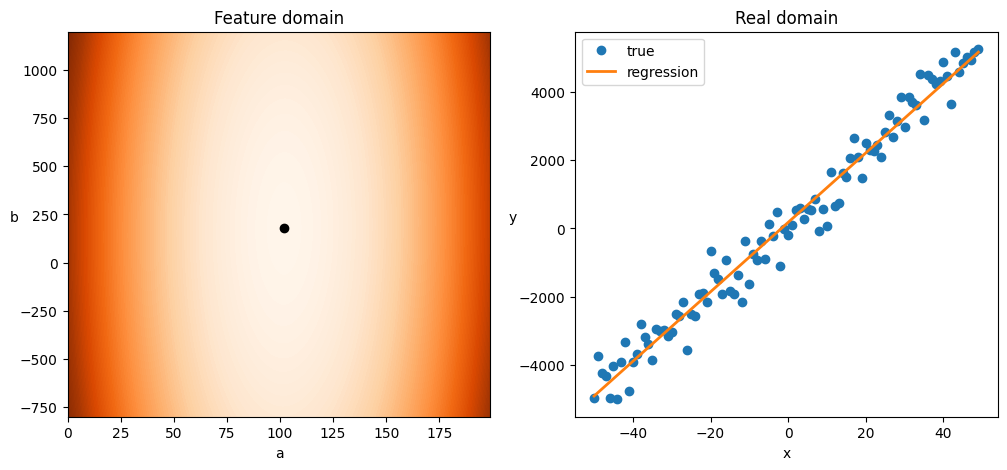

In [151]:
print("true line: y = {}x + {}".format(A, B))
print("regression line: y = {}x + {}".format(model.a, model.b))

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12, 5))

ax1.contourf(a_grid, b_grid, loss_grid, 100, cmap = 'Oranges')
ax1.plot(model.a, model.b, 'o', color = 'black')
ax1.set_title("Feature domain")
ax1.set_xlabel('a')
ax1.set_ylabel('b', rotation = 0)


ax2.plot(x_train, y_train, 'o', label = 'true')
ax2.plot(x_train, model.forward(x_train), linewidth = 2, label = 'regression')
ax2.legend()
ax2.set_title("Real domain")
ax2.set_xlabel('x')
ax2.set_ylabel('y', rotation = 0)
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


EPOCH: 0
Epoch: 1, Loss: 9201005.459636984
EPOCH: 0
Epoch: 1, Loss: 3065094.2523256503
EPOCH: 1
Epoch: 1, Loss: 1092568.0070004093
EPOCH: 2
Epoch: 1, Loss: 2027833.3951878557
EPOCH: 3
Epoch: 1, Loss: 3375528.306005284
EPOCH: 4
Epoch: 1, Loss: 3566222.076783604
EPOCH: 5
Epoch: 1, Loss: 2740228.9396024887
EPOCH: 6
Epoch: 1, Loss: 1617822.1087753638
EPOCH: 7
Epoch: 1, Loss: 808360.887909297
EPOCH: 8
Epoch: 1, Loss: 592047.7348446795
EPOCH: 9
Epoch: 1, Loss: 877379.0425067038
EPOCH: 10
Epoch: 1, Loss: 1314500.238597843
EPOCH: 11
Epoch: 1, Loss: 1549473.574525705
EPOCH: 12
Epoch: 1, Loss: 1437605.4082224453
EPOCH: 13
Epoch: 1, Loss: 1066312.4967201226
EPOCH: 14
Epoch: 1, Loss: 642577.4741247843
EPOCH: 15
Epoch: 1, Loss: 360883.9488164759
EPOCH: 16
Epoch: 1, Loss: 311179.8105664592
EPOCH: 17
Epoch: 1, Loss: 449648.6914678448
EPOCH: 18
Epoch: 1, Loss: 640557.7617873854
EPOCH: 19
Epoch: 1, Loss: 745666.8328811249
EPOCH: 20
Epoch: 1, Loss: 702706.421911272
EPOCH: 21
Epoch: 1, Loss: 545364.24216

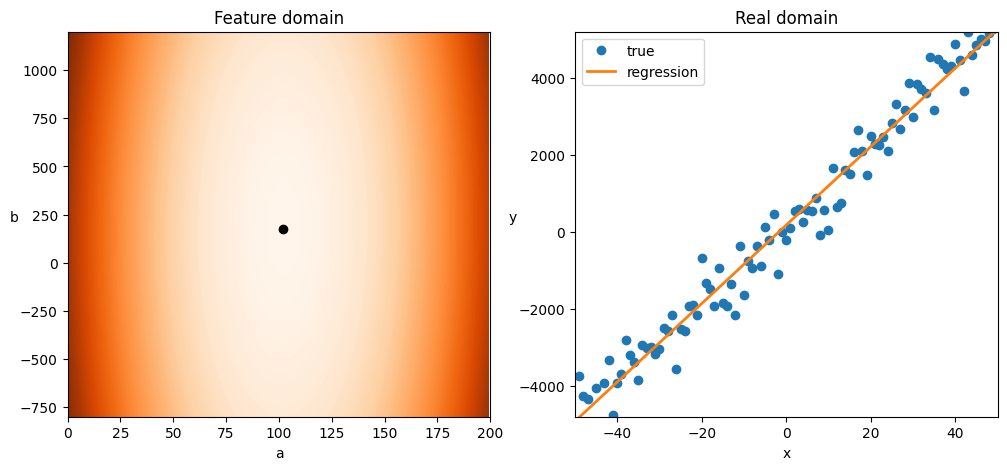

In [152]:
# export anumation using matplotlib

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12, 5))
# ax1: feature domain
ax1.set_xlim(A-100, A+100)
ax1.set_ylim(B-1000, B+1000)

# ax2: real domain
ax2.set_xlim(-50, 50)
ax2.set_ylim(-50*A+B, 50*A+B)


model = LinearRegression(lr = 50)
def animate(i):
    ax1.clear()
    ax2.clear()

    # ax1: feature domain
    ax1.set_xlim(A-100, A+100)
    ax1.set_ylim(B-1000, B+1000)

    # ax2: real domain
    ax2.set_xlim(-50, 50)
    ax2.set_ylim(-50*A+B, 50*A+B)

    ax1.contourf(a_grid, b_grid, loss_grid, 100, cmap = 'Oranges')
    ax1.plot(model.a, model.b, 'o', color = 'black')
    ax1.set_title("Feature domain")
    ax1.set_xlabel('a')
    ax1.set_ylabel('b', rotation = 0)
    ax2.plot(x_train, y_train, 'o', label = 'true')
    ax2.plot(x_train, model.forward(x_train), linewidth = 2, label = 'regression')
    ax2.legend()
    ax2.set_title("Real domain")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y', rotation = 0)
    print(f"EPOCH: {i}")
    train(model, x_train, y_train, verbose = True, one_step = True)


ani = animation.FuncAnimation(fig, animate, frames = EPOCHS, interval = 0)
ani.save('./regression.gif', writer = 'imagemagick', fps = 30)
plt.show()